In [1]:
#  Imports
import gdal
from gdalconst import * 
import matplotlib.pyplot as plt
import os
import numpy as np
import operator
import scipy.stats
%matplotlib inline

In [2]:
# Clear the existing temp tiff files
os.system('rm -f waterVH.tiff')
os.system('rm -f landVH.tiff')
os.system('rm -f VH.tiff')

vhfile = '/home/cvandevries/Documents/S1A_IW_GRDH_1SDV_20151008T055819_20151008T055844_008057_00B493_241C.SAFE/measurement/s1a-iw-grd-vh-20151008t055819-20151008t055844-008057-00b493-002.tiff'
vvfile = '/home/cvandevries/Documents/S1A_IW_GRDH_1SDV_20151008T055819_20151008T055844_008057_00B493_241C.SAFE/measurement/s1a-iw-grd-vv-20151008t055819-20151008t055844-008057-00b493-001.tiff'

# Create temp tiff file with a bounding box
commandVH = 'gdalwarp -t_srs EPSG:4326 -te 2 51.05 4.3 51.44 ' + vhfile + ' VH.tiff'
commandVH_water = 'gdalwarp -t_srs EPSG:4326 -te 2 51.3 3 51.44 ' + vhfile + ' waterVH.tiff'
commandVH_land = 'gdalwarp -t_srs EPSG:4326 -te 4 51.0 5 51.1 ' + vhfile + ' landVH.tiff'

os.system(commandVH)
os.system(commandVH_water)
os.system(commandVH_land)


0

In [3]:
# Water colorbands
water_dataVH = gdal.Open('waterVH.tiff', GA_ReadOnly)
waterVH_band = water_dataVH.GetRasterBand(1)
waterVH_band = waterVH_band.ReadAsArray()

# Land colorbands
land_dataVH = gdal.Open('landVH.tiff', GA_ReadOnly)
landVH_band = land_dataVH.GetRasterBand(1)
landVH_band = landVH_band.ReadAsArray()
water_dataVH, land_dataVH = None,None

# Land and water colorbands
VHdata = gdal.Open('VH.tiff', GA_ReadOnly)
VHband = VHdata.GetRasterBand(1)
VHband = VHband.ReadAsArray()

wet = np.log10(waterVH_band)
dry = np.log10(landVH_band)
total = np.log10(VHband)

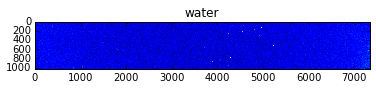

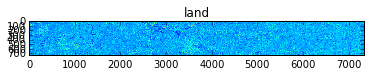

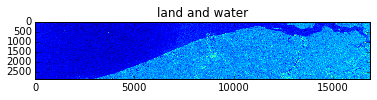

In [4]:
# visualizations of parts of the tiffs
plt.imshow(wet, vmin =1, vmax = 4.5)
plt.title('water')

plt.figure()
plt.imshow(dry, vmin =1, vmax = 4.5)
plt.title('land')

plt.figure()
plt.imshow(total, vmin =1, vmax = 4.5)
plt.title('land and water')


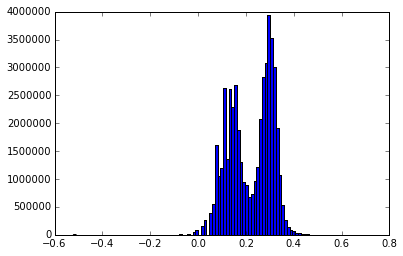

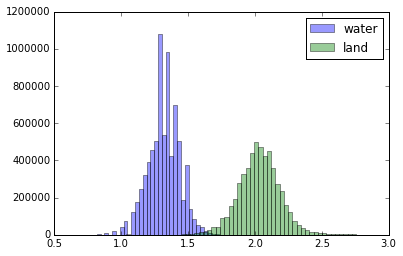

In [5]:
# Visualization of the distribution of the color band 
# Total distribution
_=plt.hist(np.log10(total.flat), bins= 100)

# Distribution for a complete wet part and a complete dry part
plt.figure()
_=plt.hist(wet.flat, bins= 100, label = 'water', alpha = 0.4)
_=plt.hist(dry.flat, bins = 100, label = 'land', alpha = 0.4)
plt.xlim(0.5, 3)
plt.legend()

In [6]:
wet = np.log10(waterVH_band)
dry = np.log10(landVH_band)
total = np.log10(VHband)

In [7]:
# Z scores
loc_wet, scale_wet = scipy.stats.norm.fit(wet)
loc_dry, scale_dry = scipy.stats.norm.fit(dry)
z_wet = lambda value: (value - loc_wet)/scale_wet
z_dry = lambda value: (value - loc_dry)/scale_dry

<module 'matplotlib.pyplot' from '/home/cvandevries/.virtualenvs/test/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

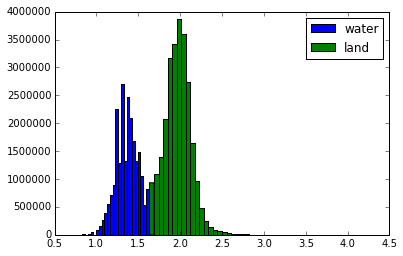

In [8]:
water = np.abs(z_wet(total)) < np.abs(z_dry(total))
_ = plt.hist(total[water], label='water', bins = 40)
_ = plt.hist(total[~water], label='land', bins =50)
plt.xlim(0.5,)
plt.legend()

plt.figure()
plt


<matplotlib.colorbar.Colorbar instance at 0x7feff42a7e18>

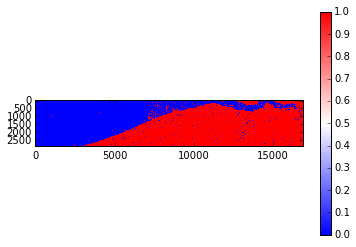

In [9]:
# 0 = water 1 = land, determined by values above
wetdry = total
wetdry[water] = 0
wetdry[~water] = 1
plt.imshow(wetdry, cmap = 'bwr')
plt.colorbar()